# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# Import Basic Viz Libraries
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/top-5-blended-car-prices/__results__.html
/kaggle/input/top-5-blended-car-prices/submission_8.csv
/kaggle/input/top-5-blended-car-prices/submission_9.csv
/kaggle/input/top-5-blended-car-prices/__notebook__.ipynb
/kaggle/input/top-5-blended-car-prices/__output__.json
/kaggle/input/top-5-blended-car-prices/custom.css
/kaggle/input/playground-series-s4e9/sample_submission.csv
/kaggle/input/playground-series-s4e9/train.csv
/kaggle/input/playground-series-s4e9/test.csv
/kaggle/input/used-car-price-prediction-dataset/used_cars.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv', sep=','); columns = train.columns.tolist(); 
test =pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv', sep=',')

In [3]:
train.isna().sum()
train = train.dropna()

In [4]:
test.isna().sum()   

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

In [5]:
categorical_features_with_missing = ['fuel_type', 'accident', 'clean_title']
for feature in categorical_features_with_missing:
    test[feature].fillna(test[feature].mode()[0], inplace=True)
test.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

In [6]:
def preparing_data(df):
    print(f"Missing Value : {df.isna().sum().sum()}\n")
    print("=" * 75)
    print(f"Duplicate value : {df.duplicated().sum().sum()}")
    print("=" * 75)
    print(f"target value : {train[columns[-1]].unique()}")
    print("=" * 75)
    print(f"train info data : {df.info(max_cols=37)}")
    print("=" * 75)
    print(f"train shape: {df.shape}")


def print_unique_values(dataframe, columns):
    for column in columns:
        unique_values = dataframe[column].unique()
        print(f"{column} unique value : {unique_values}")
        print("=" * 75)

def print_count_values(dataframe, columns):
    for column in columns:
        count_value  = dataframe[column].value_counts()
        print(f"{column} number of occurences : {count_value}")
        print("=" * 75)
    
def print_nunique_values(dataframe, columns):
    for column in columns:
        unique_values = dataframe[column].nunique()
        print(f"{column} nunique value : {unique_values}")
        print("=" * 75)

In [7]:
preparing_data(train)

Missing Value : 0

Duplicate value : 0
target value : [  4200   4999  13900 ...  47998 159998  54598]
<class 'pandas.core.frame.DataFrame'>
Index: 162610 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            162610 non-null  int64 
 1   brand         162610 non-null  object
 2   model         162610 non-null  object
 3   model_year    162610 non-null  int64 
 4   milage        162610 non-null  int64 
 5   fuel_type     162610 non-null  object
 6   engine        162610 non-null  object
 7   transmission  162610 non-null  object
 8   ext_col       162610 non-null  object
 9   int_col       162610 non-null  object
 10  accident      162610 non-null  object
 11  clean_title   162610 non-null  object
 12  price         162610 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 17.4+ MB
train info data : None
train shape: (162610, 13)


In [8]:
train.describe()

id     model_year         milage         price
count  162610.000000  162610.000000  162610.000000  1.626100e+05
mean    94197.039137    2015.158822   71105.487086  4.081699e+04
std     54467.770815       5.699531   50157.874111  7.653857e+04
min         0.000000    1974.000000     100.000000  2.000000e+03
25%     47026.250000    2012.000000   29000.000000  1.570000e+04
50%     94139.000000    2016.000000   64300.000000  2.850000e+04
75%    141421.750000    2019.000000  101000.000000  4.699900e+04
max    188532.000000    2024.000000  405000.000000  2.954083e+06

In [9]:
print_unique_values(train, columns)

id unique value : [     0      1      2 ... 188529 188530 188532]
brand unique value : ['MINI' 'Lincoln' 'Chevrolet' 'Genesis' 'Mercedes-Benz' 'Audi' 'Ford'
 'BMW' 'Cadillac' 'Land' 'GMC' 'Toyota' 'Hyundai' 'Volvo' 'Volkswagen'
 'Buick' 'Rivian' 'Hummer' 'Alfa' 'INFINITI' 'Jeep' 'Porsche' 'Honda'
 'Lexus' 'Dodge' 'Nissan' 'Jaguar' 'Kia' 'Mitsubishi' 'Rolls-Royce'
 'Maserati' 'Pontiac' 'Saturn' 'Bentley' 'Tesla' 'Mazda' 'Subaru'
 'Ferrari' 'Aston' 'Acura' 'Lamborghini' 'Chrysler' 'RAM' 'McLaren'
 'Lucid' 'Lotus' 'Scion' 'Plymouth' 'Suzuki' 'FIAT' 'Saab' 'Bugatti'
 'Mercury' 'Karma' 'Maybach' 'Polestar' 'smart']
model unique value : ['Cooper S Base' 'LS V8' 'Silverado 2500 LT' ... 'ForTwo Pure' 'RDX'
 'Q4 e-tron Sportback Premium']
model_year unique value : [2007 2002 2017 2021 2018 2016 2020 2015 2011 2013 2023 2019 2012 2014
 2008 2009 2022 2003 2005 2001 2006 2000 2010 2004 1997 1998 1999 1994
 1993 1996 1995 2024 1974 1992]
milage unique value : [213000 143250 136731 ...  26691   292

In [10]:
print_count_values(train, columns)

id number of occurences : id
188532    1
0         1
1         1
2         1
3         1
         ..
23        1
24        1
25        1
26        1
27        1
Name: count, Length: 162610, dtype: int64
brand number of occurences : brand
Ford             21348
Mercedes-Benz    16530
BMW              15461
Chevrolet        15170
Audi              9111
Porsche           9025
Toyota            7862
Land              7857
Lexus             7622
Jeep              5330
Cadillac          4330
Nissan            3536
RAM               3391
INFINITI          3103
GMC               2970
Dodge             2967
Mazda             2393
Subaru            2281
Lincoln           2261
Honda             1828
Acura             1738
Hyundai           1714
Kia               1659
Volkswagen        1608
Jaguar            1064
MINI              1035
Bentley           1012
Maserati           836
Genesis            826
Buick              720
Chrysler           693
Volvo              656
Mitsubishi         532
Pon

In [11]:
print_nunique_values(train, columns)

id nunique value : 162610
brand nunique value : 57
model nunique value : 1883
model_year nunique value : 34
milage nunique value : 5853
fuel_type nunique value : 7
engine nunique value : 1098
transmission nunique value : 52
ext_col nunique value : 312
int_col nunique value : 156
accident nunique value : 2
clean_title nunique value : 1
price nunique value : 1531


In [12]:
model_pivot = train.pivot_table(index='model_year', columns='model', values='price', aggfunc='sum')
model_pivot.fillna(value=0)

model       124 Spider Abarth    128 i     135 i   135 is  1500 Big Horn  \
model_year                                                                 
1974                      0.0      0.0       0.0      0.0            0.0   
1992                      0.0      0.0       0.0      0.0            0.0   
1993                      0.0      0.0       0.0      0.0            0.0   
1994                      0.0      0.0       0.0      0.0            0.0   
1995                      0.0      0.0       0.0      0.0            0.0   
1996                      0.0      0.0       0.0      0.0            0.0   
1997                      0.0      0.0       0.0      0.0            0.0   
1998                      0.0      0.0       0.0      0.0            0.0   
1999                      0.0      0.0       0.0      0.0         9000.0   
2000                      0.0      0.0       0.0      0.0            0.0   
2001                      0.0      0.0   16000.0      0.0            0.0   
2002                      0.0      0.0       0.0      0.0         8500.0   
2003                      0.0      0.0       0.0      0.0            0.0   
2004                      0.0      0.0   30000.0      0.0         9000.0   
2005                      0.0      0.0   18400.0      0.0            0.0   
2006                      0.0      0.0   18500.0  21990.0            0.0   
2007                      0.0      0.0   60988.0      0.0        23649.0   
2008                      0.0      0.0  147597.0      0.0            0.0   
2009                      0.0      0.0  325694.0      0.0         2500.0   
2010                      0.0      0.0   44349.0      0.0            0.0   
2011                      0.0  49699.0  439072.0  44353.0        10800.0   
2012                      0.0  16699.0  224697.0  15000.0            0.0   
2013                      0.0  77345.0  243250.0  42495.0       350595.0   
2014                  17700.0   7900.0  220478.0  51999.0       669871.0   
2015                      0.0  33900.0   91295.0  14500.0       686268.0   
2016                      0.0  67500.0   42727.0  22500.0       450093.0   
2017                  24325.0      0.0   83800.0      0.0       895779.0   
2018                      0.0  34500.0   43999.0  26000.0       448994.0   
2019                      0.0      0.0       0.0      0.0      1567670.0   
2020                      0.0      0.0       0.0      0.0      4427650.0   
2021                  43900.0      0.0       0.0      0.0     10902366.0   
2022                      0.0      0.0       0.0  47995.0      4883864.0   
2023                      0.0      0.0       0.0      0.0       702787.0   
2024                      0.0      0.0       0.0      0.0       103500.0   

model       1500 Cheyenne  1500 Cheyenne Extended Cab  1500 Classic SLT  \
model_year                                                                
1974                  0.0                         0.0               0.0   
1992                  0.0                         0.0               0.0   
1993                  0.0                         0.0               0.0   
1994              25299.0                     17800.0               0.0   
1995                  0.0                     63200.0               0.0   
1996                  0.0                     84900.0               0.0   
1997                  0.0                         0.0               0.0   
1998                  0.0                         0.0               0.0   
1999                  0.0                         0.0               0.0   
2000                  0.0                         0.0               0.0   
2001                  0.0                         0.0               0.0   
2002                  0.0                         0.0               0.0   
2003                  0.0                         0.0               0.0   
2004                  0.0                         0.0               0.0   
2005                  0.0                         0.0          

In [13]:
price = train.loc[train['price'] == train['price'].max()]
price

id          brand  \
220        220           Ford   
1880      1880       Chrysler   
13838    13838         Toyota   
14693    14693        Hyundai   
16034    16034  Mercedes-Benz   
18946    18946           Audi   
36615    36615           Ford   
42177    42177           Ford   
42219    42219           Land   
49575    49575            RAM   
55428    55428          Lexus   
55493    55493          Lexus   
65043    65043  Mercedes-Benz   
66224    66224      Chevrolet   
67957    67957           Land   
72448    72448  Mercedes-Benz   
79269    79269           Ford   
79469    79469          Aston   
80269    80269            GMC   
81056    81056           Ford   
89180    89180           Ford   
92612    92612          Lexus   
96473    96473           Ford   
97654    97654        Pontiac   
99283    99283           Land   
103061  103061            RAM   
103189  103189          Dodge   
118167  118167      Chevrolet   
128002  128002            RAM   
129013  129013  Mercedes-Benz   
129054  129054       INFINITI   
138122  138122       Cadillac   
150549  150549            RAM   
151415  151415           Ford   
157056  157056       Cadillac   
163487  163487           Land   
172766  172766          Lexus   
176936  176936       Cadillac   
181021  181021       Cadillac   
183006  183006           Land   
183468  183468        Bentley   

                                                    model  model_year  milage  \
220                                             F-150 XLT        2021   26315   
1880                                            300C Base        2003   55900   
13838                                       Highlander SE        2014   85000   
14693                                        Santa Fe SEL        2022   13865   
16034                             SL-Class SL500 Roadster        2005   34068   
18946                                             S4 Base        2004   73500   
36615                          Excursion Limited Ultimate        2002   89900   
42177                                          Mustang GT        2005   82000   
42219          Rover Range Rover 3.0L V6 Supercharged HSE        2021   29850   
49575                                        1500 Laramie        2022   13610   
55428                                         LS 430 Base        2004   39750   
55493                                         LS 430 Base        2002   27600   
65043                   AMG GLE AMG GLE 63 S-Model 4MATIC        2017    4590   
66224                                       Corvette Base        2005   23133   
67957   Rover Range Rover 5.0L Supercharged Autobiogra...        2017   67280   
72448                             SL-Class SL550 Roadster        2001  113500   
79269                               Expedition Timberline        2021    7758   
79469                          Martin DB7 Vantage Volante        2005   89900   
80269                       Sierra 1500 SLE1 Extended Cab        2020    2750   
81056                                            F-150 XL        2022    4200   
89180                           Expedition Max King Ranch        2021   45979   
92612                                         ES 350 Base        2008  132252   
96473                              Expedition Max Limited        2022   18160   
97654                                   Firebird Trans Am        2001   64776   
99283                      Rover Range Rover P525 HSE SWB        2020   65800   
103061                               1500 Classic Warlock        2019   36757   
103189                          Ram 2500 Laramie Quad Cab        2005   27600   
118167                                      Corvette Base        2007   54323   
128002                                       1500 Laramie        2022   13500   
129013                            SL-Class SL600 Roadster        2005   32000   
129054                                          QX60 Base        2017   84224   
138122                   Escalade

In [14]:
# Grouping the data by 'model_year' and counting unique entries for each category
model_year_df = train.groupby('model_year')[['model', 'brand', 'fuel_type', 'accident']].count().reset_index()
model_year_set = train.groupby('model_year')[['milage', 'price']].sum()

In [15]:
# Create crosstab tables for each category
brand_counts = pd.crosstab(train['model_year'], train['brand'])
fuel_type_counts = pd.crosstab(train['model_year'], train['fuel_type'])
accident_counts = pd.crosstab(train['model_year'], train['accident'])
model_counts = pd.crosstab(train['model_year'], train['model'])

In [16]:
plt.figure(figsize=(30, 15))
plt.pie(x=model_year_set['milage'], labels=model_year_set['milage'], autopct='%1.1f%%') 
plt.title("Milage Pie chart")
plt.show()

In [17]:
plt.figure(figsize=(16, 8))
sns.barplot(data=train, x='brand', y='price')
plt.xticks(rotation ='vertical')
plt.title('Price according Brand')
plt.show()

In [18]:
brand_counts.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.title('Distribution of Car Brands by Model Year')
plt.xticks(rotation=45)
plt.show()

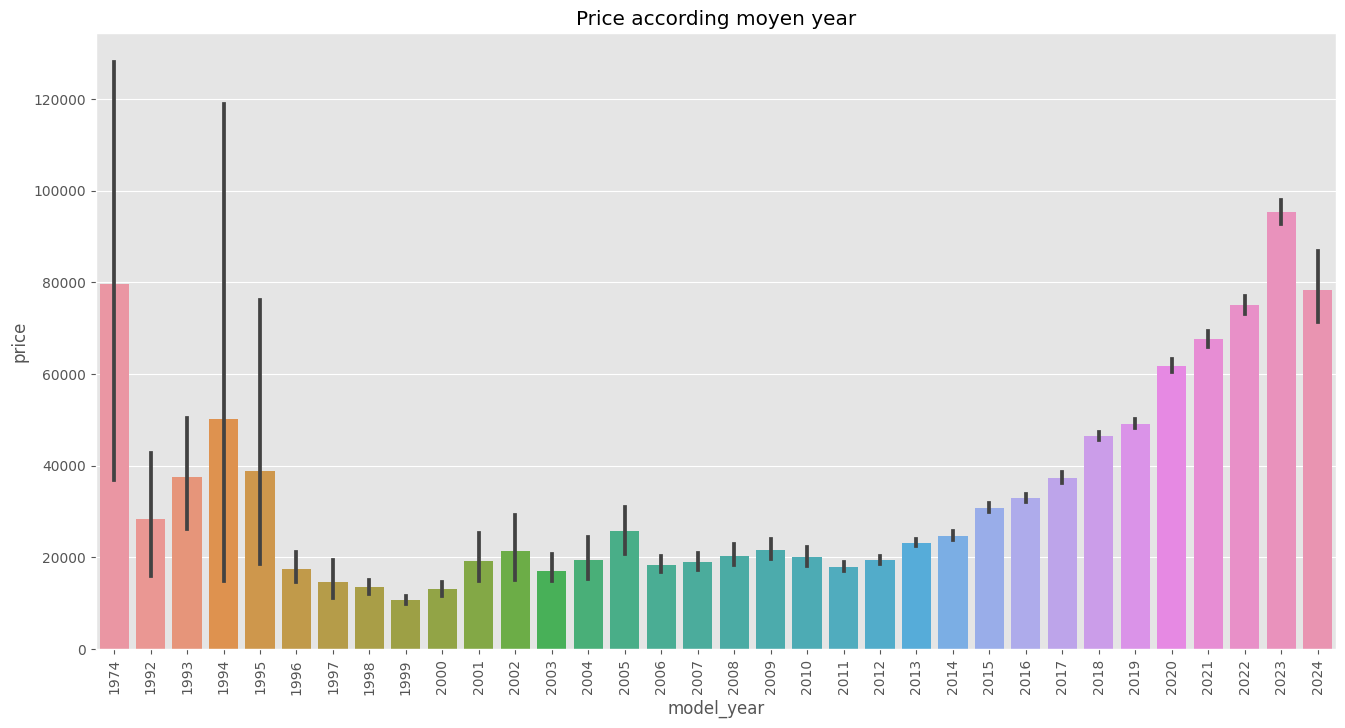

In [19]:
plt.figure(figsize=(16, 8))
sns.barplot(data=train, x='model_year', y='price')
plt.title("Price according moyen year")
plt.xticks(rotation ='vertical')
plt.show()

In [20]:
fuel_type_counts.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.title('Distribution of Fuel Types by Model Year')
plt.xticks(rotation=45)
plt.show()

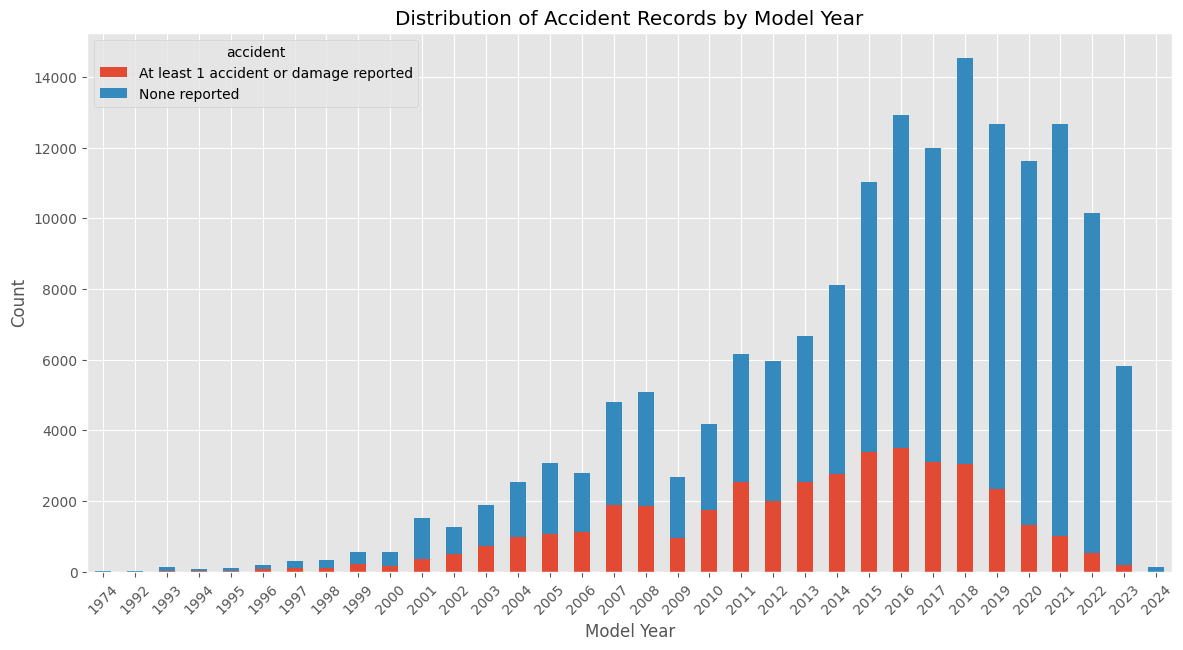

In [21]:
accident_counts.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.title('Distribution of Accident Records by Model Year')
plt.xticks(rotation=45)
plt.show()

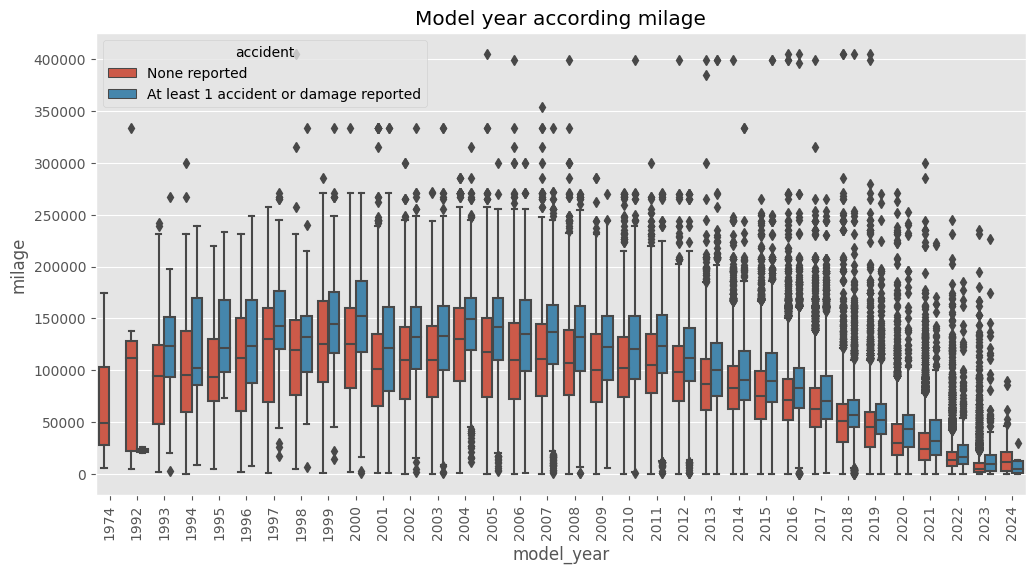

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, 
            x='model_year', 
            y=train['milage'], 
            hue='accident')
plt.xticks(rotation = 'vertical')
plt.title('Model year according milage')
plt.show()

In [23]:
plt.figure(figsize=(16, 8))
plt.hist(data=train, x='model_year', bins=34, edgecolor='black')
plt.xlabel("model year")
plt.ylabel("count")
plt.title("Distribution of model year")
plt.xticks(rotation ='vertical')
plt.show()

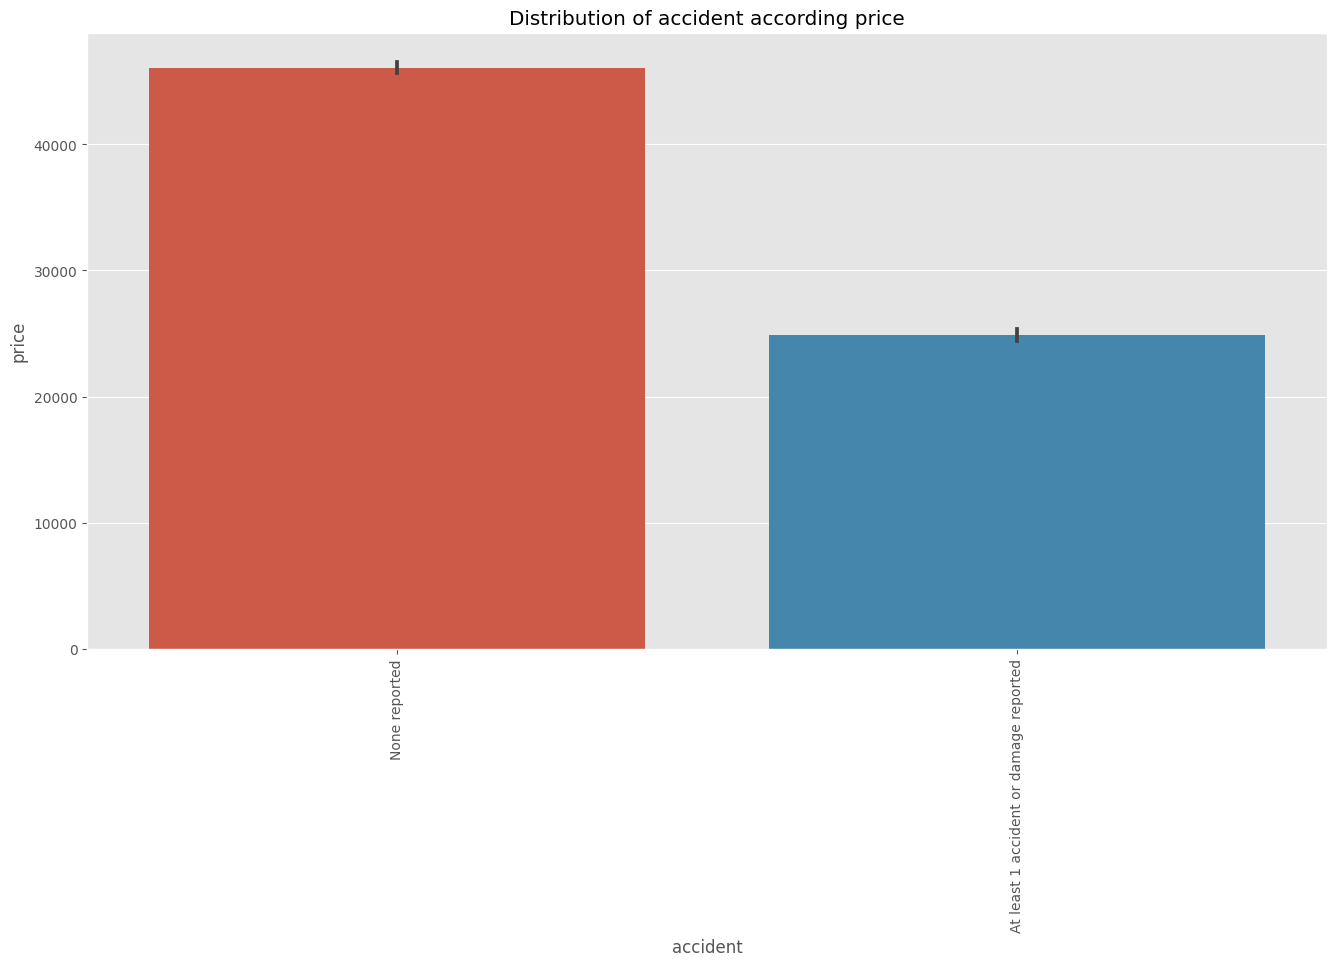

In [24]:
plt.figure(figsize=(16, 8))
sns.barplot(data=train, x='accident', y='price')
plt.title("Distribution of accident according price")
plt.xticks(rotation ='vertical')
plt.show()

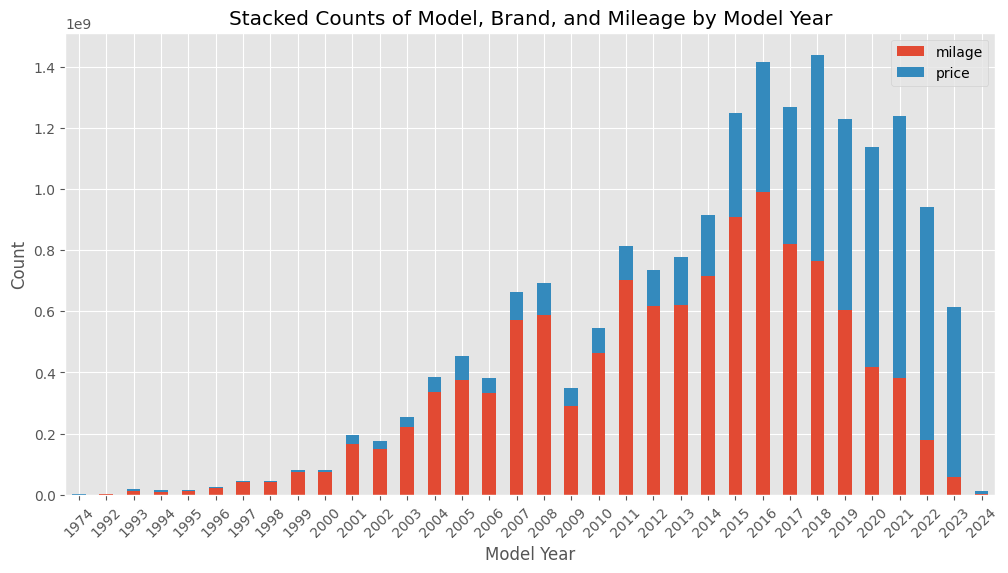

In [25]:
model_year_set.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.title('Stacked Counts of Model, Brand, and Mileage by Model Year')
plt.xticks(rotation=45)
plt.show()

In [26]:
plt.figure(figsize=(16, 8))
sns.barplot(data=train, x='transmission', y='price')
plt.title("Distribution of tranmission according price")
plt.xticks(rotation ='vertical')
plt.show()

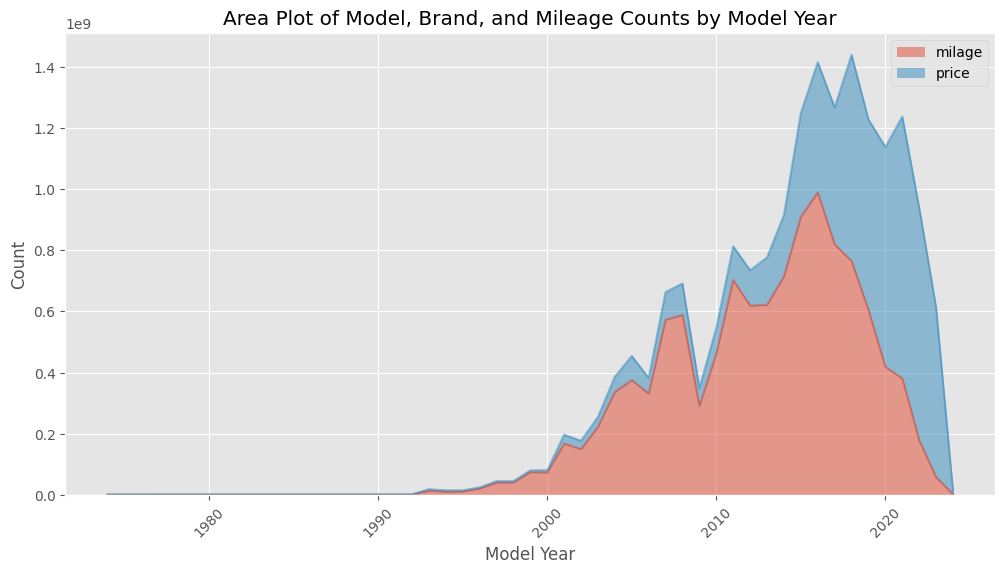

In [27]:
model_year_set.plot(kind='area', figsize=(12, 6), alpha=0.5)
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.title('Area Plot of Model, Brand, and Mileage Counts by Model Year')
plt.xticks(rotation=45)
plt.show()

In [28]:
plt.figure(figsize=(16, 8))
sns.barplot(data=train, x='fuel_type', y='price')
plt.title("Distribution of fuel type with price")
plt.xticks(rotation ='vertical')
plt.show()

In [29]:
model_year_set.plot(kind='line', figsize=(12, 6), marker='o')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.title('Trends of Model, Brand, and Mileage Counts by Model Year')
plt.xticks(rotation=45)
plt.show()

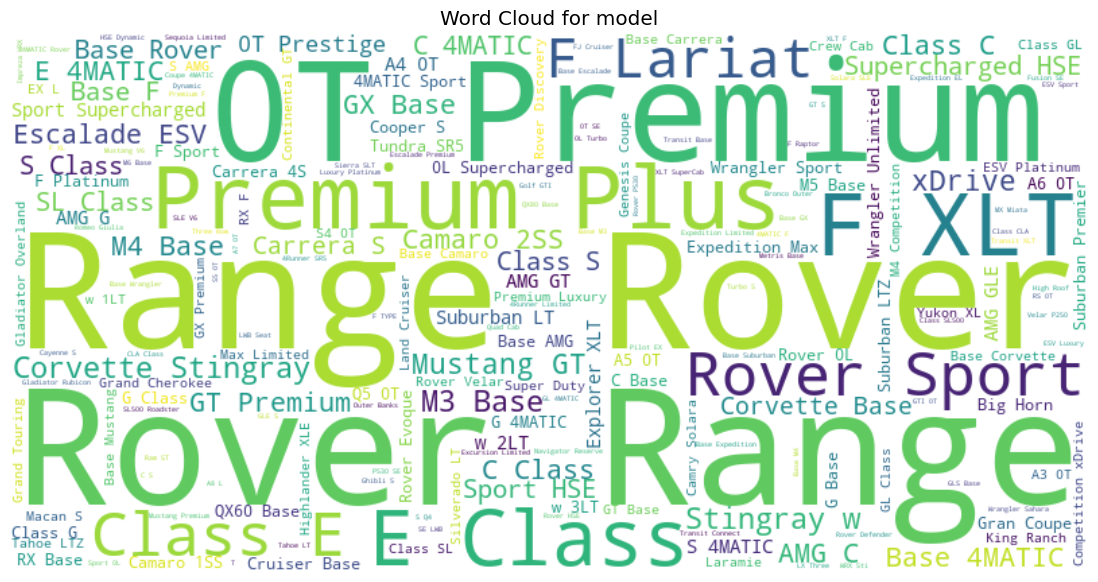

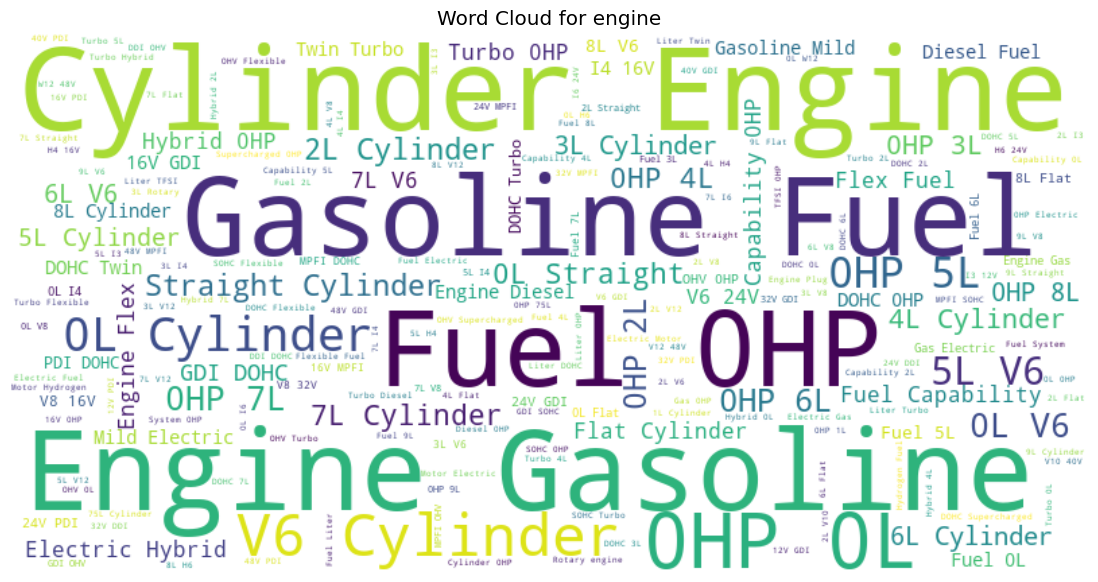

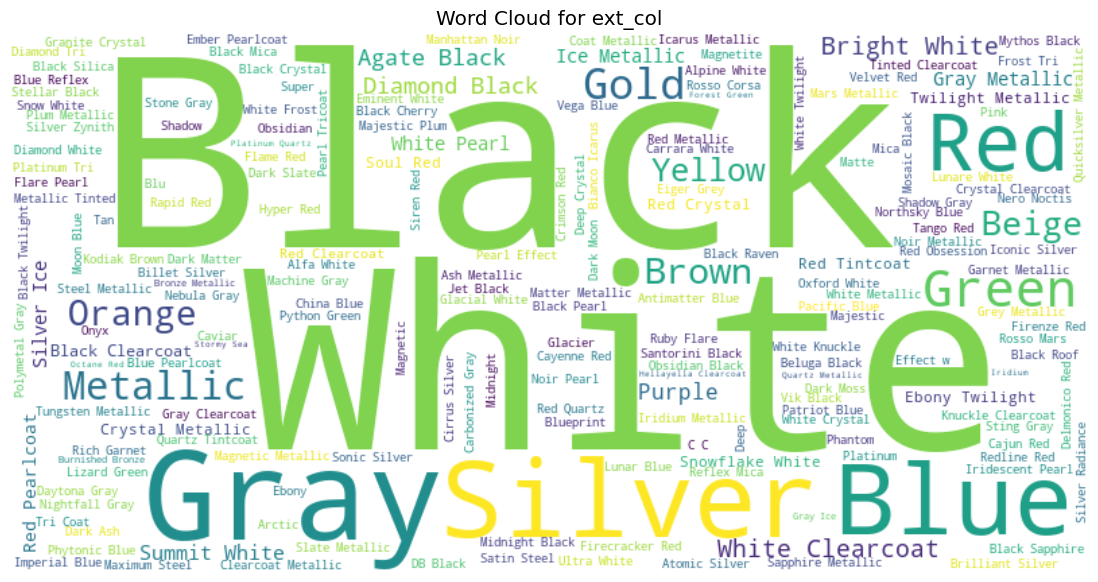

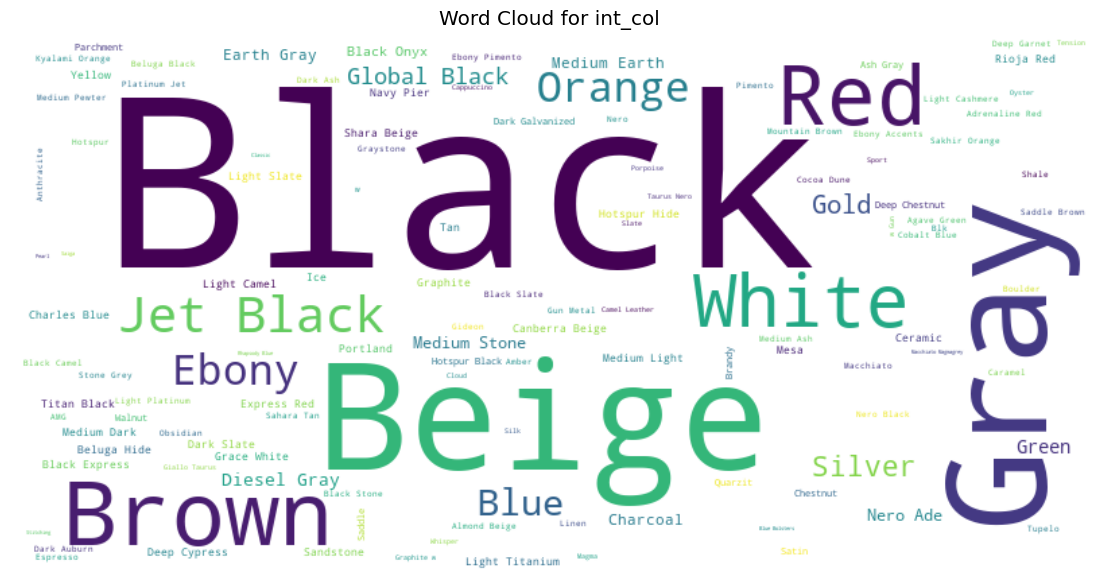

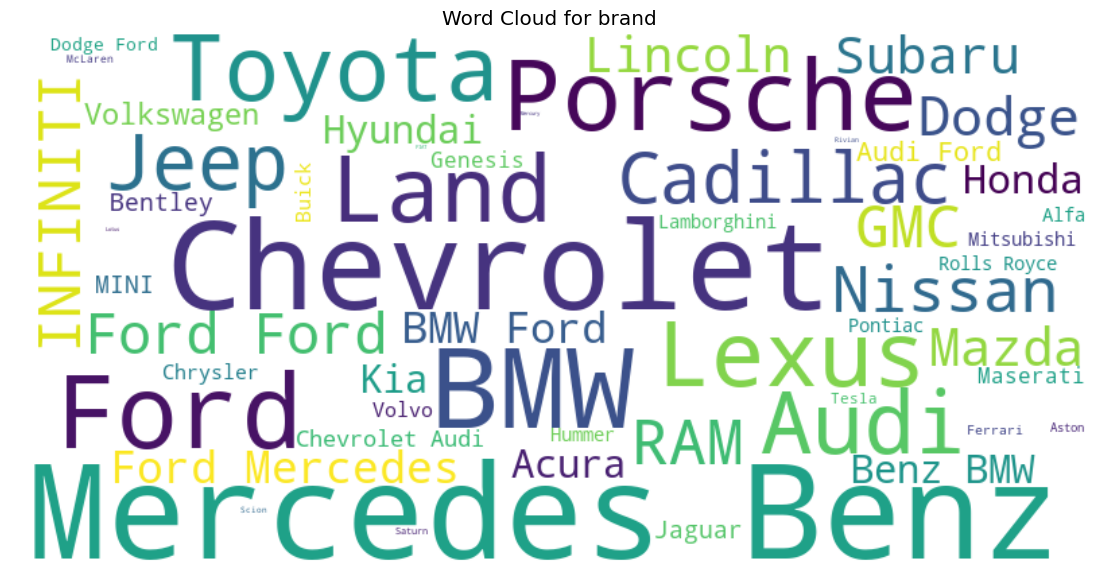

In [30]:
cat_colms = [ 'model', 'engine', 'ext_col', 'int_col', 'brand']

for feature in cat_colms:
    text = ' '.join(train[feature].astype(str).values)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {feature}')
    plt.subplots_adjust(hspace=3) 
    plt.show()

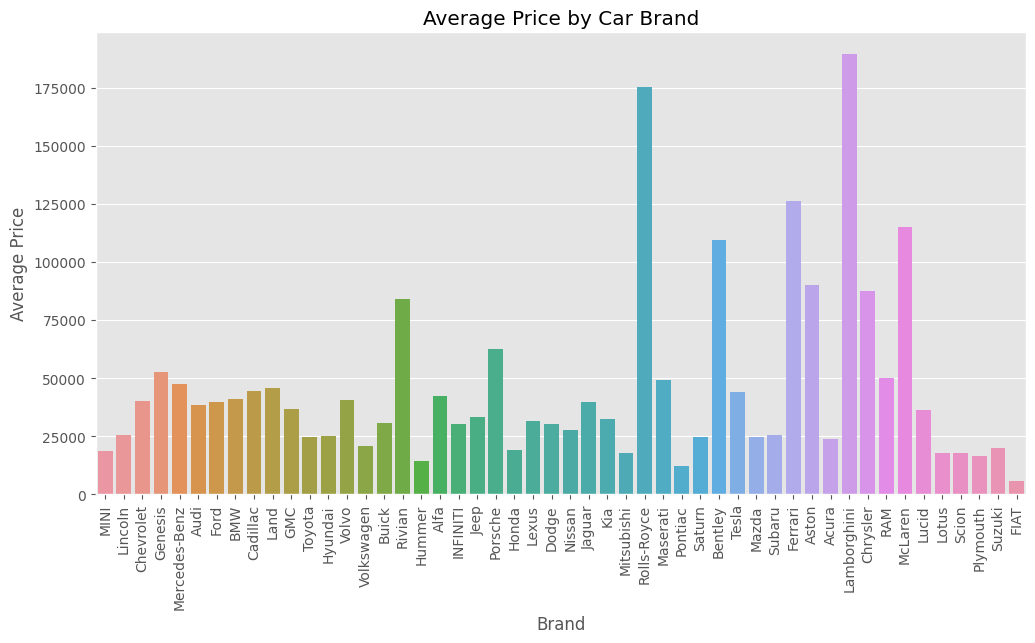

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price', data=train[:10000], errorbar=None)
plt.title('Average Price by Car Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  
plt.show()

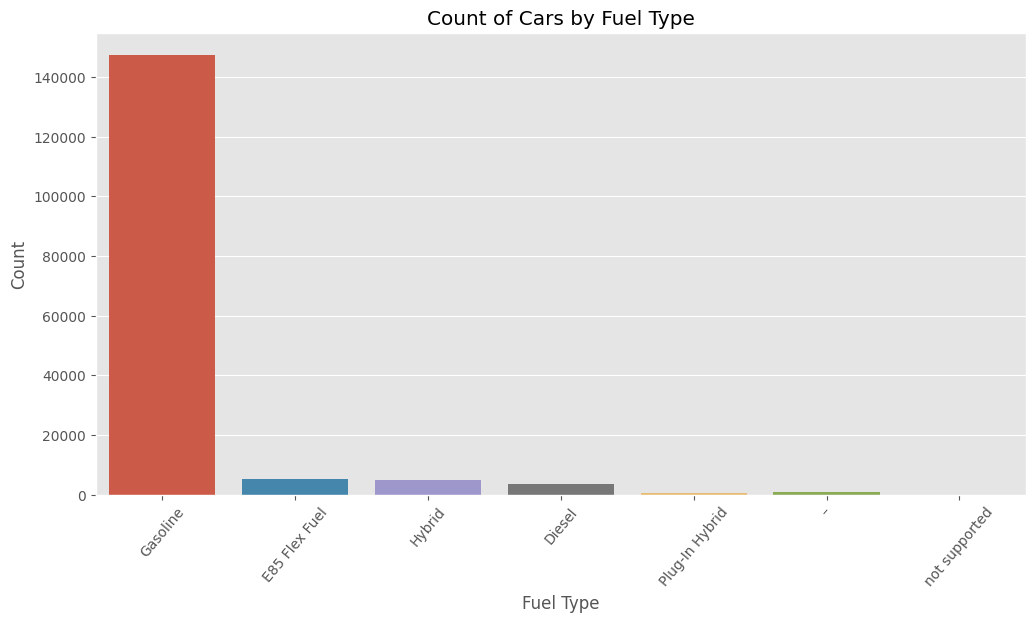

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='fuel_type', data=train)
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()

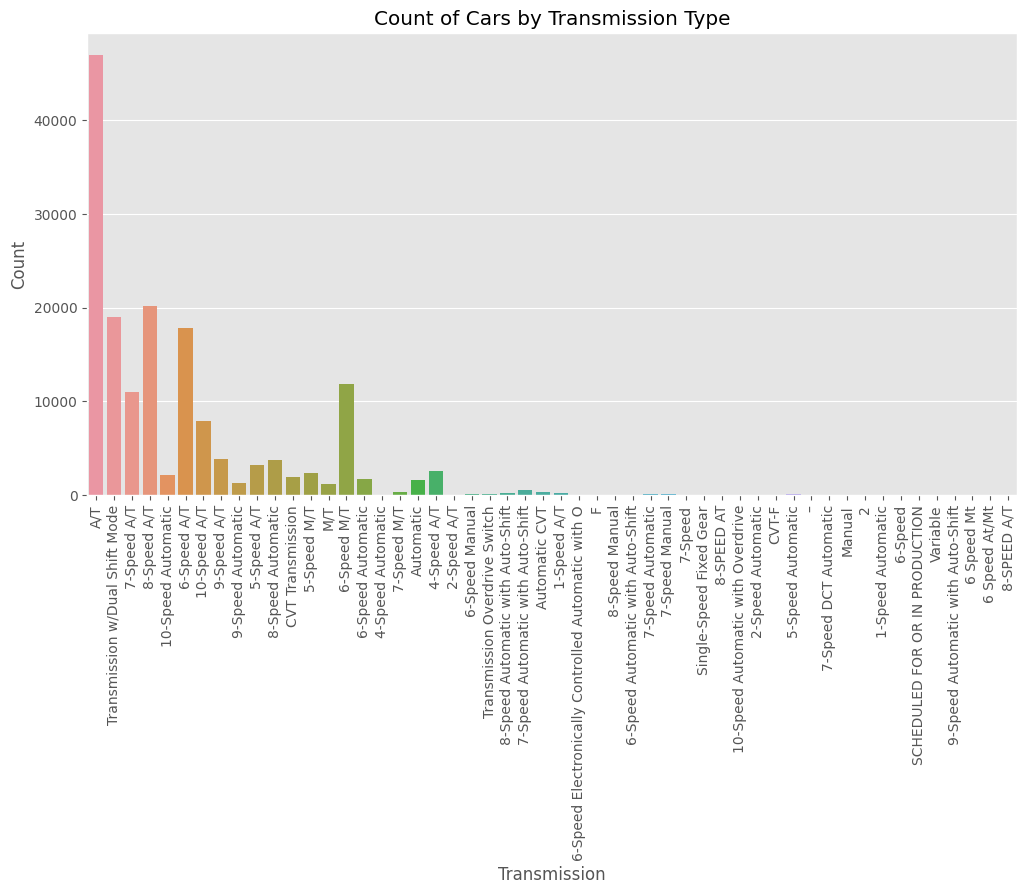

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='transmission', data=train)
plt.title('Count of Cars by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

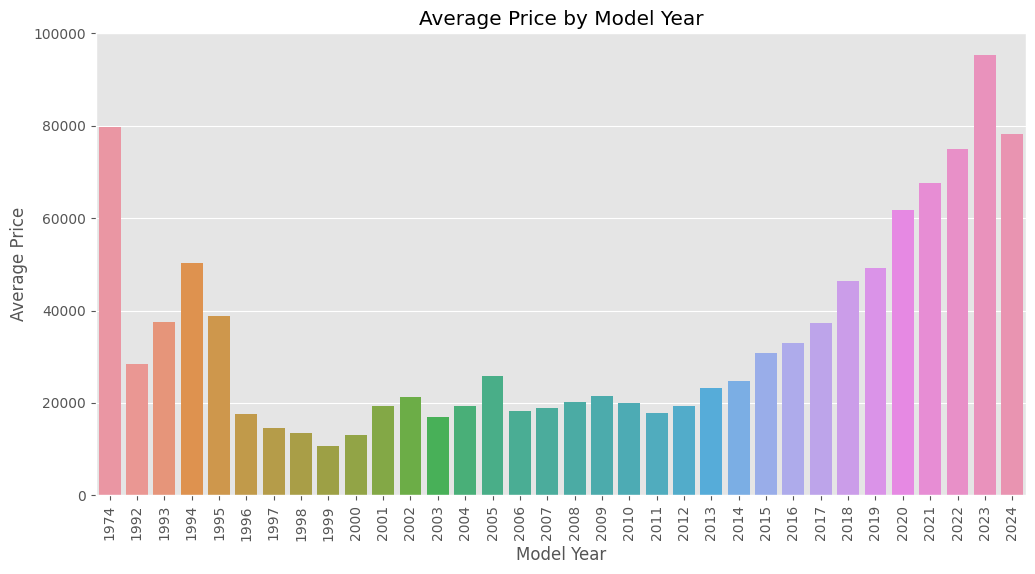

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x='model_year', y='price', data=train, errorbar=None)
plt.title('Average Price by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

# Model

In [35]:
!pip install -U autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than

In [36]:
from autogluon.tabular import TabularPredictor
import re

train = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')
Original = pd.read_csv('/kaggle/input/used-car-price-prediction-dataset/used_cars.csv')
Original[['milage', 'price']] = Original[['milage', 'price']].map(
    lambda x: int(''.join(re.findall(r'\d+', x))))

import lightgbm as lgb
from lightgbm import log_evaluation, early_stopping
from catboost import CatBoostRegressor, Pool

from xgboost import XGBRegressor


import random

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

from autogluon.tabular import TabularPredictor

In [37]:
train = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')
Original = pd.read_csv('/kaggle/input/used-car-price-prediction-dataset/used_cars.csv')
Original[['milage', 'price']] = Original[['milage', 'price']].map(
    lambda x: int(''.join(re.findall(r'\d+', x))))

In [38]:
train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)


In [39]:
train = pd.concat([train, Original], ignore_index=True)

In [40]:
def extract_age_features(df):
    current_year = 2024

    df['Vehicle_Age'] = current_year - df['model_year']
    
    df['Mileage_per_Year'] = df['milage'] / df['Vehicle_Age']
    df['milage_with_age'] =  df.groupby('Vehicle_Age')['milage'].transform('mean')
    
    df['Mileage_per_Year_with_age'] =  df.groupby('Vehicle_Age')['Mileage_per_Year'].transform('mean')
    
    return df


def extract_other_features(df):
    
    luxury_brands =  ['Mercedes-Benz', 'BMW', 'Audi', 'Porsche', 'Land', 
                    'Lexus', 'Jaguar', 'Bentley', 'Maserati', 'Lamborghini', 
                    'Rolls-Royce', 'Ferrari', 'McLaren', 'Aston', 'Maybach']
    df['Is_Luxury_Brand'] = df['brand'].apply(lambda x: 1 if x in luxury_brands else 0)
    

    return df

In [41]:
train = extract_age_features(train)
test = extract_age_features(test)

In [42]:
train = extract_other_features(train)
test = extract_other_features(test)

In [43]:
def update(df):
    
    t = 100
    
    cat_c = ['brand','model','fuel_type','engine','transmission','ext_col','int_col','accident','clean_title',
             
            ]
    re_ = ['model','engine','transmission','ext_col','int_col']
    
    for col in re_:
        df.loc[df[col].value_counts(dropna=False)[df[col]].values < t, col] = "noise"
        
    for col in cat_c:
        df[col] = df[col].fillna('missing')
        df[col] = df[col].astype('category')
        
    return df

In [44]:
train  = update(train)
test   = update(test)

In [45]:
X = train.drop('price', axis=1)
y = train['price']

In [46]:
import lightgbm as lgb
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold



callbacks = [log_evaluation(period=300), early_stopping(stopping_rounds=200)]

cat_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"cat_cols--------{cat_cols}")


def get_MAE_oof(df, target, lgb_params, cat_params=None, model_type='LGBM'):

    
    oof_predictions = np.zeros(len(df))
    kf = KFold(n_splits=5, shuffle=True, random_state=1)
    models = []
    rmse_scores = []
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(df)):
        print(f"Training fold {fold + 1}/{5} with {model_type}")

        X_train, X_val = df.iloc[train_idx], df.iloc[val_idx]
        y_train, y_val = target.iloc[train_idx], target.iloc[val_idx]

        if model_type == 'LGBM':
            train_data = lgb.Dataset(X_train, label=y_train)
            val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)
            
            model = lgb.train(
                lgb_params,
                train_data,
                valid_sets=[train_data, val_data],
                valid_names=['train', 'valid'],
                callbacks=callbacks    
            )
        
        elif model_type == 'CAT':
            train_data = Pool(data=X_train, label=y_train , cat_features=cat_cols)
            val_data = Pool(data=X_val, label=y_val , cat_features=cat_cols )
            
            model = CatBoostRegressor(**cat_params)
            model.fit(train_data, eval_set=val_data, verbose=150, early_stopping_rounds=200)
        
        models.append(model)
        
        if model_type == 'LGBM':
            pred = model.predict(X_val, num_iteration=model.best_iteration)
        elif model_type == 'CAT':
            pred = model.predict(X_val)
        
        rmse = np.sqrt(mean_squared_error(y_val, pred))
        rmse_scores.append(rmse)

        print(f'{model_type} Fold RMSE: {rmse}')
        
        oof_predictions[val_idx] = pred
        
    print(f'Mean RMSE: {np.mean(rmse_scores)}')
    return oof_predictions, models




lgb_params = {
    'objective': 'MAE',
    'n_estimators': 1200,  # Daha fazla ağaç
    'random_state': 1,
    'learning_rate': 0.009,  # Biraz daha düşük öğrenme oranı
    'max_depth': 30,  # Daha derin ağaçlar
    'num_leaves': 80,  # Daha fazla yaprak
    'colsample_bytree': 0.85,  # Daha fazla özellik seçimi
    'subsample': 0.85,  # Daha fazla veri örneği
    'reg_alpha': 0.08,  # Biraz daha düşük regularization
    'reg_lambda': 0.08
}

oof_predictions_lgbm, models_lgbm = get_MAE_oof(X, y, lgb_params, model_type='LGBM')
X['LGBM_MAE'] = oof_predictions_lgbm


LGBM_preds = np.zeros(len(test))
for model in models_lgbm:
    LGBM_preds += model.predict(test) / len(models_lgbm)
test['LGBM_MAE'] = LGBM_preds



lgb_params = {
    'objective': 'MSE',
    'n_estimators': 1200,
    'random_state': 1,
    'learning_rate': 0.009,
    'max_depth': 30,
    'num_leaves': 80,
    'colsample_bytree': 0.85,
    'subsample': 0.85,
    'reg_alpha': 0.08,
    'reg_lambda': 0.08
}

oof_predictions_lgbm, models_lgbm = get_MAE_oof(X, y, lgb_params, model_type='LGBM')

X['LGBM_MSE_diff'] = oof_predictions_lgbm - X['LGBM_MAE']


LGBM_preds = np.zeros(len(test))
for model in models_lgbm:
    LGBM_preds += model.predict(test) / len(models_lgbm)
test['LGBM_MSE_diff'] = LGBM_preds - test['LGBM_MAE']

test.head()

cat_cols--------['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
Training fold 1/5 with LGBM
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1724
[LightGBM] [Info] Number of data points in the train set: 154033, number of used features: 16
[LightGBM] [Info] Start training from score 30825.000000
Training until validation scores don't improve for 200 rounds
[300]	train's l1: 17037.7	valid's l1: 17108.3
[600]	train's l1: 16572.3	valid's l1: 16895.8
[900]	train's l1: 16368.4	valid's l1: 16850.1
[1200]	train's l1: 16250	valid's l1: 16840.4
Did not meet early stoppin

brand                 model  model_year  milage fuel_type  \
0  Land                 noise        2015   98000  Gasoline   
1  Land     Rover Defender SE        2020    9142    Hybrid   
2  Ford    Expedition Limited        2022   28121  Gasoline   
3  Audi                 noise        2016   61258  Gasoline   
4  Audi  A6 2.0T Premium Plus        2018   59000  Gasoline   

                                              engine        transmission  \
0       240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel         6-Speed A/T   
1  395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...         8-Speed A/T   
2                    3.5L V6 24V PDI DOHC Twin Turbo  10-Speed Automatic   
3                                     2.0 Liter TFSI           Automatic   
4       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                 A/T   

  ext_col int_col       accident clean_title  Vehicle_Age  Mileage_per_Year  \
0   White   Beige  None reported         Yes            9      10888.888889   
1  Silver   Black  None reported         Yes            4       2285.500000   
2   White   Ebony  None reported     missing            2      14060.500000   
3   noise   Black  None reported     missing            8       7657.250000   
4    Gray   Black  None reported         Yes            6       9833.333333   

   milage_with_age  Mileage_per_Year_with_age  Is_Luxury_Brand      LGBM_MAE  \
0     81078.503981                9008.722665                1  16409.060078   
1     34258.886442                8564.721611                1  56859.998526   
2     17877.043403                8938.521702                0  49165.866355   
3     75999.679762                9499.959970                1  25670.058531   
4     52105.532436                8684.255406                1  27903.202169   

   LGBM_MSE_diff  
0    4378.056025  
1   16897.856186  
2    6965.732580  
3    3162.813932  
4    4443.049256

In [47]:
X['price'] = y

predictor = TabularPredictor(label='price',
                            eval_metric='rmse',
                            problem_type='regression').fit(X,
                                                       presets='best_quality',
                                                       time_limit=3600*1,
                                                       verbosity=2,
                                                       num_gpus=0,
                                                       included_model_types=['GBM', 'CAT']
                                                      )

No path specified. Models will be saved in: "AutogluonModels/ag-20240930_055552"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Jun 27 20:43:36 UTC 2024
CPU Count:          4
Memory Avail:       29.88 GB / 31.36 GB (95.3%)
Disk Space Avail:   19.50 GB / 19.52 GB (99.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets o

In [48]:
y_pred = predictor.predict(test)


In [49]:
sub_blend = pd.read_csv('/kaggle/input/top-5-blended-car-prices/submission_9.csv')
sample_sub = pd.read_csv('/kaggle/input/playground-series-s4e9/sample_submission.csv')

In [50]:
sample_sub['price'] =  y_pred * 0.5 + sub_blend['price'] * 0.5
sample_sub.to_csv("submission.csv", index=False)
sample_sub.head()

id         price
0  188533  18944.869937
1  188534  77975.643476
2  188535  58102.007268
3  188536  29967.136408
4  188537  31077.864176